In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import regex as re
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
from plotnine import *
import ast
import re

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('barca.csv.gz')

In [3]:
data.shape

(19455, 75)

In [4]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.945500e+04,1.945500e+04,1.945500e+04,19453.000000,19453.000000,19455.000000,19455.000000,19455.000000,15686.000000,17473.000000,...,14463.000000,14461.000000,14464.000000,14462.000000,14462.000000,19455.000000,19455.000000,19455.000000,19455.000000,14465.000000
mean,5.005474e+17,2.024121e+13,1.940174e+08,64.335578,82.273428,41.392155,2.166901,3.358006,1.405680,1.812167,...,4.612721,4.720560,4.717004,4.746561,4.457897,47.004112,33.590028,13.253200,0.115600,1.469256
std,5.206017e+17,5.515767e+00,1.974503e+08,146.542027,173.088217,0.014133,0.017748,2.198880,0.851528,1.287432,...,0.507061,0.468202,0.486641,0.386945,0.563768,98.560278,84.549048,56.977015,0.955928,2.047189
min,1.867400e+04,2.024121e+13,3.073000e+03,1.000000,1.000000,41.335310,2.085593,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.655076e+07,2.024121e+13,1.069368e+07,2.000000,3.000000,41.381071,2.156501,2.000000,1.000000,1.000000,...,4.500000,4.670000,4.670000,4.670000,4.320000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,5.525972e+17,2.024121e+13,1.274824e+08,8.000000,11.000000,41.389879,2.167610,3.000000,1.000000,1.000000,...,4.750000,4.860000,4.860000,4.850000,4.575000,6.000000,2.000000,0.000000,0.000000,0.780000
75%,1.029474e+18,2.024121e+13,3.579465e+08,42.000000,60.000000,41.401599,2.177510,4.000000,2.000000,2.000000,...,4.930000,5.000000,5.000000,5.000000,4.790000,34.000000,20.000000,2.000000,0.000000,2.190000
max,1.309263e+18,2.024121e+13,6.654107e+08,868.000000,2139.000000,41.456377,2.221830,16.000000,50.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,465.000000,465.000000,384.000000,18.000000,80.220000


In [5]:
print(data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
data.drop(["scrape_id", "source", 'description',  'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about','bathrooms_text',
        'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'license', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications' ], axis=1, inplace=True)
# dropping unneccesaary columns

In [7]:
data['beds'].describe()

count    15608.000000
mean         2.455536
std          2.155889
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        127.000000
Name: beds, dtype: float64

In [8]:
data.shape

(19455, 46)

In [9]:
data["price"] = data["price"].str.replace("$", "")

In [10]:
data["price"] = data["price"].str.replace(",", "").astype("float")

In [11]:
data['price'].describe()

count    15691.000000
mean       124.208017
std        288.156084
min          5.000000
25%         53.000000
50%         88.000000
75%        130.000000
max       9999.000000
Name: price, dtype: float64

In [12]:
data.shape

(19455, 46)

In [13]:
for g in data.columns:
    if "reviews" in g:
        print(g)


number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
reviews_per_month


In [14]:
data.room_type.value_counts()


room_type
Entire home/apt    11653
Private room        7510
Shared room          177
Hotel room           115
Name: count, dtype: int64

In [15]:
## Create Numerical variables
#data["usd_price_day"] = data["price"]
#data["p_host_response_rate"] = data["host_response_rate"].astype("float")
data["p_host_response_rate"] = data["host_response_rate"].str.rstrip("%").astype(float)


In [16]:
for column in (
    "accommodates",
    "bathrooms",
    "review_scores_rating",
    "number_of_reviews",
    "reviews_per_month",
    "minimum_nights",
    "beds",
):
    data["n_" + re.sub(r"[^[:alnum:]_]", "", column.lower())] = data[column].astype(
        "float"
    )

In [17]:
data.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'p_h

In [18]:
data.drop(["accommodates",
    "bathrooms",
    "review_scores_rating",
    "number_of_reviews",
    "reviews_per_month",
    "minimum_nights",
    "beds", ], axis=1, inplace=True)
# dropping those same columns

In [19]:
data["n_days_since"] = pd.to_datetime(
    data["calendar_last_scraped"], format="%Y-%m-%d"
) - pd.to_datetime(data["first_review"], format="%Y-%m-%d")
# Previous row creates a timedelta object in each row. Get the elapsed number of days like:
data["n_days_since"] = [x.days for x in data["n_days_since"]]


In [20]:
data.shape

(19455, 48)

In [21]:
data.isnull().sum().loc[lambda x: x > 0]

host_response_time              3122
host_response_rate              3122
host_acceptance_rate            2863
host_is_superhost                439
host_has_profile_pic               2
host_identity_verified             2
neighbourhood                   9664
bedrooms                        1982
price                           3764
calendar_updated               19455
has_availability                1191
first_review                    4990
last_review                     4990
review_scores_accuracy          4993
review_scores_cleanliness       4992
review_scores_checkin           4994
review_scores_communication     4991
review_scores_location          4993
review_scores_value             4993
p_host_response_rate            3122
n_bathrooms                     3769
n_review_scores_rating          4990
n_reviews_per_month             4990
n_beds                          3847
n_days_since                    4990
dtype: int64

In [22]:
data.drop(["host_response_time",
    "host_response_rate",
    "calendar_updated",
    "neighbourhood",
    "first_review",
 "last_review", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin",         
"review_scores_communication",
"review_scores_location",
"review_scores_value"
  ], axis=1, inplace=True)

In [23]:
data.isnull().sum().loc[lambda x: x > 0]

host_acceptance_rate      2863
host_is_superhost          439
host_has_profile_pic         2
host_identity_verified       2
bedrooms                  1982
price                     3764
has_availability          1191
p_host_response_rate      3122
n_bathrooms               3769
n_review_scores_rating    4990
n_reviews_per_month       4990
n_beds                    3847
n_days_since              4990
dtype: int64

In [24]:
# Convert the amenities column from string representation of lists to actual lists
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

In [25]:
data['amenities'].describe()

count                                                 19455
unique                                                16612
top       [TV, Hot water, Washer, Wifi, Heating, Cleanin...
freq                                                    129
Name: amenities, dtype: object

In [26]:
# Convert amenities from string to list
data['amenities'] = data['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Define category mapping dictionary
category_map = {
    'Internet': r'(wifi|ethernet|pocket wifi|internet)',
    'Kitchen': r'(kitchen|refrigerator|microwave|oven|stove|dishwasher|toaster|coffee maker|cooking basics|dishes)',
    'Laundry': r'(washer|dryer|laundry)',
    'Safety': r'(smoke alarm|fire extinguisher|carbon monoxide alarm|first aid kit|security camera)',
    'Heating_Cooling': r'(air conditioning|heating|central heating|portable fan|ceiling fan)',
    'Essentials': r'(essentials|shampoo|conditioner|body soap|toilet paper|towels|hair dryer)',
    'Parking': r'(parking|garage|driveway|carport)',
    'Entertainment': r'(tv|television|hdtv|netflix|roku|chromecast|sound system)',
    'Workspace': r'(dedicated workspace|desk|office)',
    'Family': r'(crib|high chair|baby safety|toys|children’s books)',
    'Outdoor': r'(patio|balcony|garden|bbq|grill|backyard)',
    'Luxury': r'(hot tub|sauna|pool|gym|concierge)'
}

In [27]:
def categorize_amenity(amenity):
    """Categorize individual amenity into broader groups"""
    # Handle null values and convert to string
    if pd.isna(amenity) or not isinstance(amenity, str):
        return 'Other'
    
    # Clean special characters and normalize
    cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', amenity).lower()
    
    for category, pattern in category_map.items():
        if re.search(pattern, cleaned, re.IGNORECASE):
            return category
    return 'Other'

# Create mapping of all unique amenities to categories (with null handling)
unique_amenities = data['amenities'].explode().dropna().unique()

amenity_category_mapping = {amenity: categorize_amenity(amenity) for amenity in unique_amenities}

In [28]:
# Create category dummy variables
def create_category_dummies(amenities_list):
    categories = set()
    for amenity in amenities_list:
        categories.add(amenity_category_mapping.get(amenity, 'Other'))
    return {category: 1 for category in categories}

# Apply to each row and convert to DataFrame
category_dummies = data['amenities'].apply(create_category_dummies).apply(pd.Series).fillna(0)

# Combine with original data
data = pd.concat([data, category_dummies], axis=1)

# Optional: Remove original amenities column
data.drop('amenities', axis=1, inplace=True)

# Show results
print(data[list(category_map.keys()) + ['Other']].head())

   Internet  Kitchen  Laundry  Safety  Heating_Cooling  Essentials  Parking  \
0       1.0      1.0      1.0     0.0              1.0         1.0      1.0   
1       1.0      1.0      1.0     1.0              1.0         1.0      1.0   
2       1.0      1.0      1.0     1.0              1.0         1.0      1.0   
3       1.0      1.0      1.0     1.0              1.0         0.0      0.0   
4       1.0      1.0      1.0     1.0              1.0         1.0      1.0   

   Entertainment  Workspace  Family  Outdoor  Luxury  Other  
0            1.0        0.0     1.0      1.0     0.0    1.0  
1            1.0        1.0     0.0      1.0     0.0    1.0  
2            1.0        1.0     1.0      1.0     0.0    1.0  
3            1.0        1.0     0.0      0.0     0.0    1.0  
4            1.0        1.0     1.0      0.0     0.0    1.0  


In [29]:
data.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'bedrooms', 'price',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable', 'p_host_response_rate',
       'n_accommodates', 'n_bathrooms', 'n_review_scores_rating',
       'n_number_of_reviews', 'n_reviews_per_month', 'n_minimum_nights',
       'n_beds', 'n_days_since', 'Outdoor', 'Entertainment', 'Other', 'Family',
       'Essentials', 'Parking', 'Kitchen', 'Laundry', 'Heating_Cooling',
       'Internet', 'Safety', 'Workspace', 'Luxury'],
      dtype='object')

In [30]:
# with price info only
data = data.dropna(subset=["price"])

In [31]:
data.shape


(15691, 48)

In [32]:
data.isnull().sum().loc[lambda x: x > 0]

host_acceptance_rate       723
host_is_superhost          402
bedrooms                    15
has_availability           117
p_host_response_rate       879
n_bathrooms                  5
n_review_scores_rating    3453
n_reviews_per_month       3453
n_beds                      83
n_days_since              3453
dtype: int64

In [33]:
for var in ["flag_days_since","flag_review_scores_rating","flag_reviews_per_month"]:
    data[var]=[int(x) for x in data[var.replace('flag','n')].isna()]

In [34]:
data['flag_review_scores_rating'].sum()

3453

In [35]:
data = data.drop(["p_host_response_rate"],axis=1)

In [36]:
data["host_is_superhost"] = data["host_is_superhost"].fillna("0")          
data["has_availability"] = data["has_availability"].fillna("1")

# Remove '%' and convert to float
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.rstrip('%').astype(float)

data["host_acceptance_rate"] = data["host_acceptance_rate"].fillna(np.nanmedian(data["host_acceptance_rate"]))
data["n_review_scores_rating"] = data["n_review_scores_rating"].fillna(np.nanmedian(data["n_review_scores_rating"]))
data["n_reviews_per_month"] = data["n_reviews_per_month"].fillna(np.nanmedian(data["n_reviews_per_month"]))
data["n_days_since"] = data["n_days_since"].fillna(np.nanmedian(data["n_days_since"]))
data["bedrooms"] = data["bedrooms"].fillna(np.nanmedian(data["bedrooms"]))
data["n_bathrooms"] = data["n_bathrooms"].fillna(np.nanmedian(data["n_bathrooms"]))
data["n_beds"] = data["n_beds"].fillna(data["n_accommodates"])


In [37]:
data.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

In [38]:
print(data["price"].describe())

count    15691.000000
mean       124.208017
std        288.156084
min          5.000000
25%         53.000000
50%         88.000000
75%        130.000000
max       9999.000000
Name: price, dtype: float64


In [39]:
percentile_995 = data["price"].quantile(0.995)
print(percentile_995)

1070.099999999984


In [40]:
# Remove extreme values + missing from prices (this case: only 3 missing values)
data = data.loc[data.price < 1071]


In [41]:
data.shape

(15612, 50)

In [42]:
data["ln_price"] = np.log(data.price)

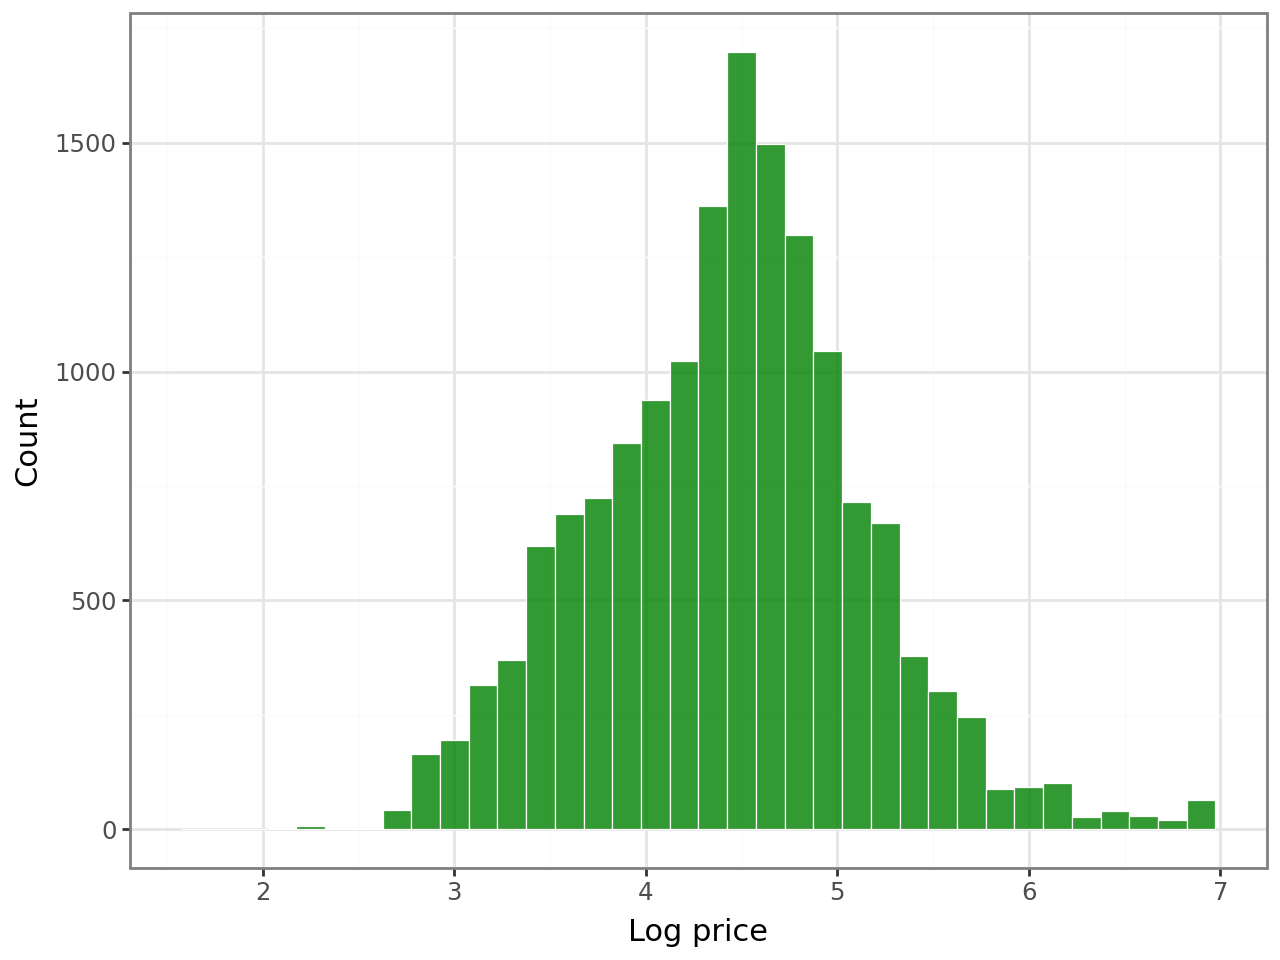

In [43]:
# Histograms
(
    ggplot(data, aes("ln_price"))
    + geom_histogram(
        binwidth=0.15, fill='green', color="white", alpha=0.8, size=0.25, closed="left"
    )
    + ylab("Count")
    + xlab("Log price")
    + theme_bw()
)


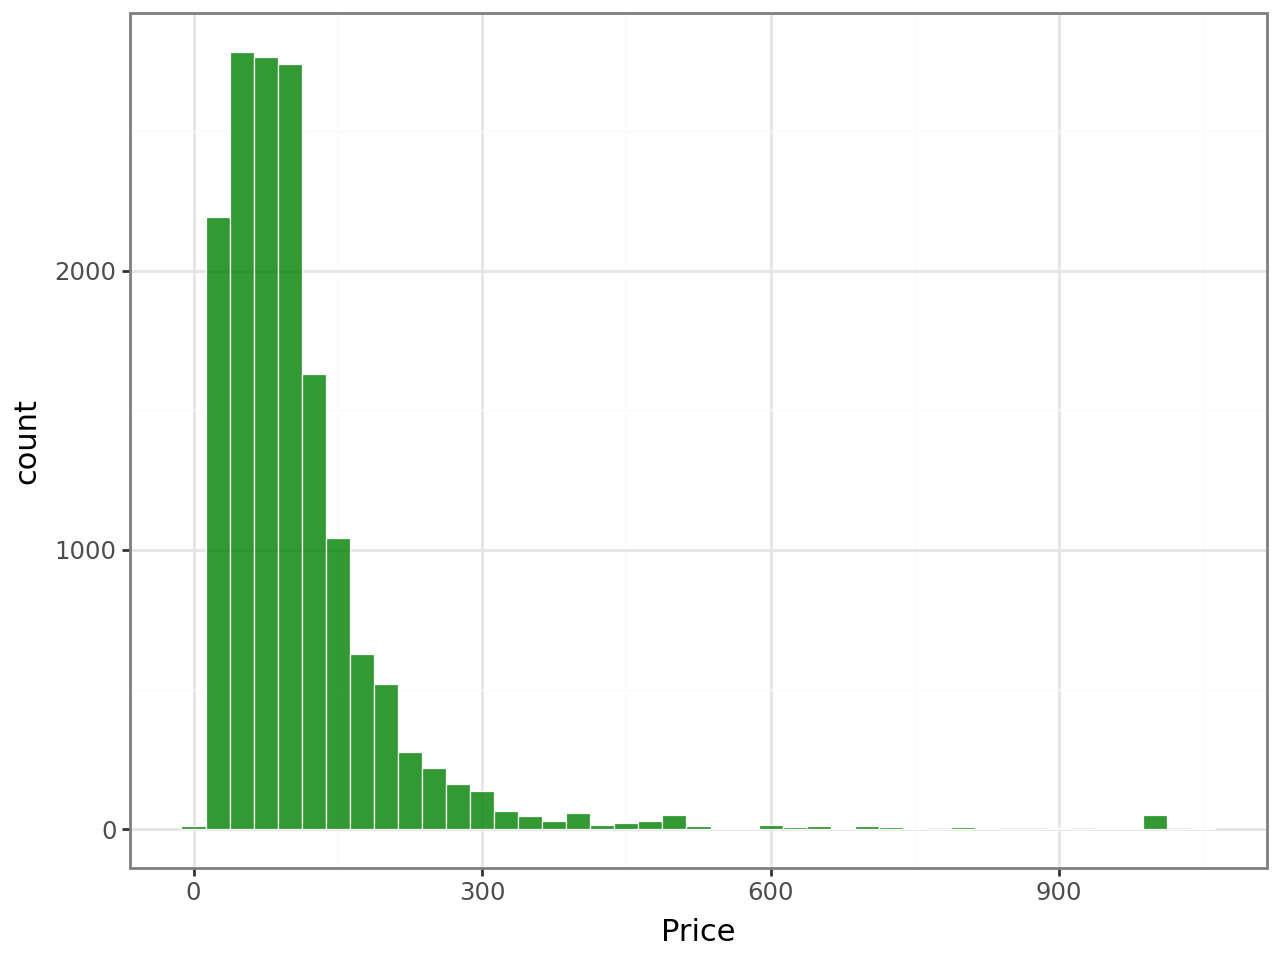

In [44]:
(
    ggplot(data, aes("price"))
    + geom_histogram(
        binwidth=25, fill='green', color="white", alpha=0.8, size=0.25, closed="left"
    )
    + ylab("count")
    + xlab("Price")
    + theme_bw()
)


In [45]:
data.groupby("n_accommodates").agg(
    mean_price=("price", np.mean),
    min_price=("price", np.min),
    max_price=("price", np.max),
    n=("price", "size"),
)


,mean_price,min_price,max_price,n
n_accommodates,,,,
1.0,42.596059,5.0,1000.0,2030
2.0,79.533841,10.0,1000.0,4595
3.0,99.303689,14.0,999.0,1518
4.0,121.665111,19.0,1045.0,3428
5.0,133.778695,8.0,1050.0,1333
6.0,155.463057,10.0,1000.0,1570
7.0,172.474747,10.0,800.0,297
8.0,209.173160,10.0,1000.0,462
9.0,244.940299,20.0,1000.0,67


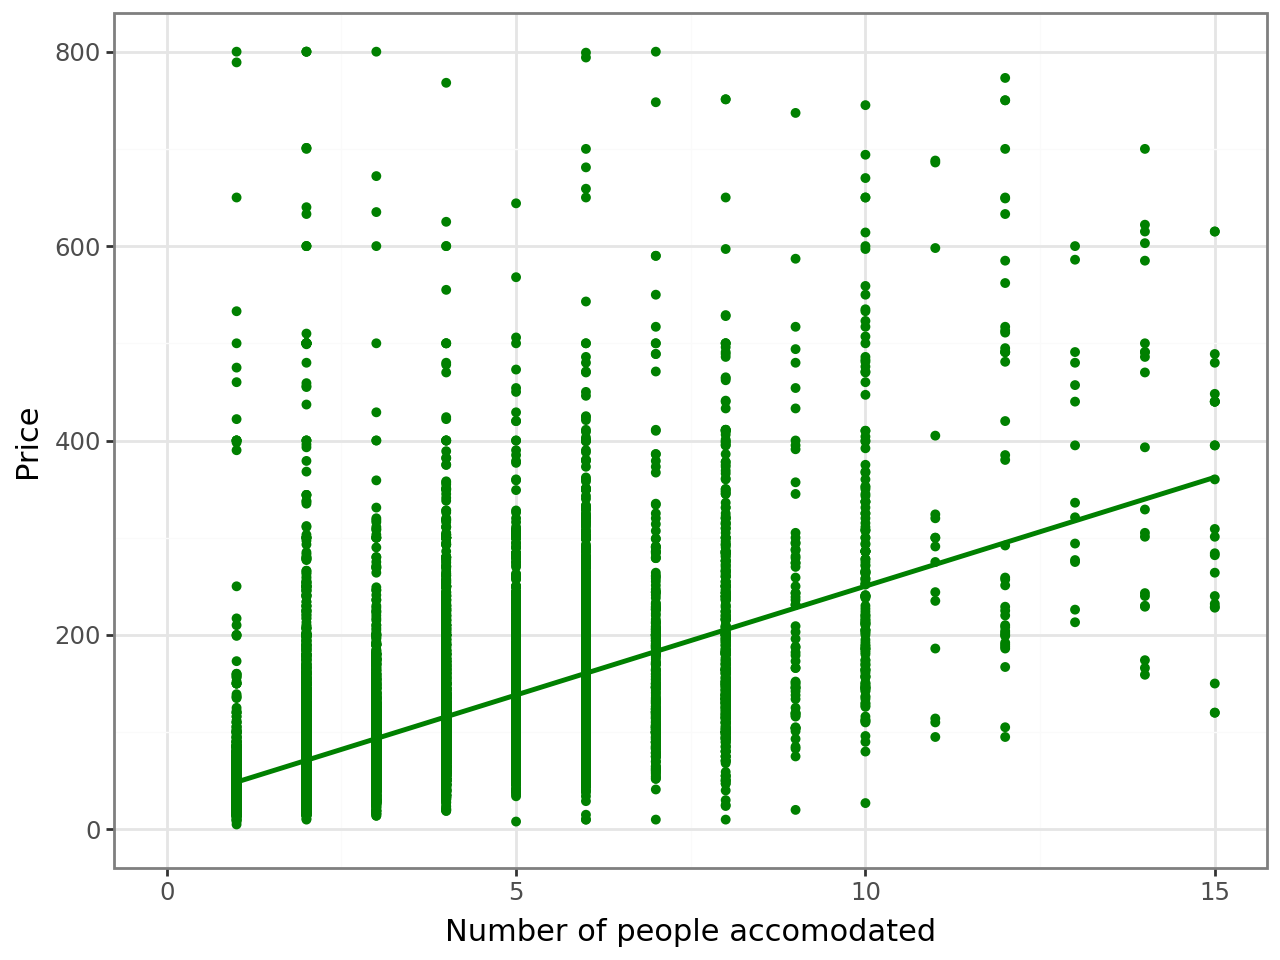

In [46]:
(
    ggplot(data, aes(x="n_accommodates", y="price"))
    + geom_point(size=1, colour='green')
    + ylim(0, 800)
    + xlim(0, 15)
    + labs(x="Number of people accomodated", y="Price")
    + geom_smooth(method="lm", colour='green', se=False)
    + theme_bw()
)


In [47]:
data["n_accommodates2"] = data["n_accommodates"] ** 2
data["ln_accommodates"] = np.log(data["n_accommodates"])
data["ln_accommodates2"] = data["ln_accommodates"] ** 2

In [48]:
# Regression 1: ln price and num of accomodates and squares
smf.ols(
    formula="ln_price ~ n_accommodates + n_accommodates2", data=data
).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     5637.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:39:21   Log-Likelihood:                -12565.
No. Observations:               15612   AIC:                         2.514e+04
Df Residuals:                   15609   BIC:                         2.516e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4734      0.012    283.459      0.000       3.449       3.497
n_accommodates      0.3284      0.005     63.663      0.000       0.318       0.338
n_accommodates2    -0.0119      0.000    -26.325      0.000      -0.013      -0.011
==============================================================================
Omnibus:                     1630.482   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4305.620
Skew:                           0.595   Prob(JB):                         0.00
Kurtosis:                       5.281   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Regression 2: ln price and log num of accomodates

smf.ols(formula="ln_price ~ ln_accommodates", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 1.246e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:39:21   Log-Likelihood:                -12227.
No. Observations:               15612   AIC:                         2.446e+04
Df Residuals:                   15610   BIC:                         2.447e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5970      0.009    417.274      0.000       3.580       3.614
ln_accommodates     0.7689      0.007    111.638      0.000       0.755       0.782
==============================================================================
Omnibus:                     1870.812   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5481.494
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                       5.601   Cond. No.                         3.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Regression 3: ln price and num of accomodates
smf.ols(formula="ln_price ~ n_accommodates", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 1.013e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:39:21   Log-Likelihood:                -12904.
No. Observations:               15612   AIC:                         2.581e+04
Df Residuals:                   15610   BIC:                         2.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7118      0.008    439.857      0.000       3.695       3.728
n_accommodates     0.2029      0.002    100.656      0.000       0.199       0.207
==============================================================================
Omnibus:                     1275.434   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3148.147
Skew:                           0.491   Prob(JB):                         0.00
Kurtosis:                       4.969   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
data.groupby("n_beds").agg(
    mean_price=("price", np.mean),
    min_price=("price", np.min),
    max_price=("price", np.max),
    n=("price", "size"),
)


,mean_price,min_price,max_price,n
n_beds,,,,
0.0,112.450161,13.0,1058.0,311
1.0,71.442503,5.0,1025.0,5896
2.0,103.495015,14.0,1045.0,3410
3.0,132.688238,8.0,1050.0,2627
4.0,134.210433,14.0,1000.0,1687
5.0,161.016796,10.0,1027.0,774
6.0,183.159389,15.0,1000.0,458
7.0,238.297561,18.0,1000.0,205
8.0,281.666667,17.0,993.0,96


In [52]:
# maybe best is to have log beds
data["ln_beds"] = np.log(data["n_beds"])


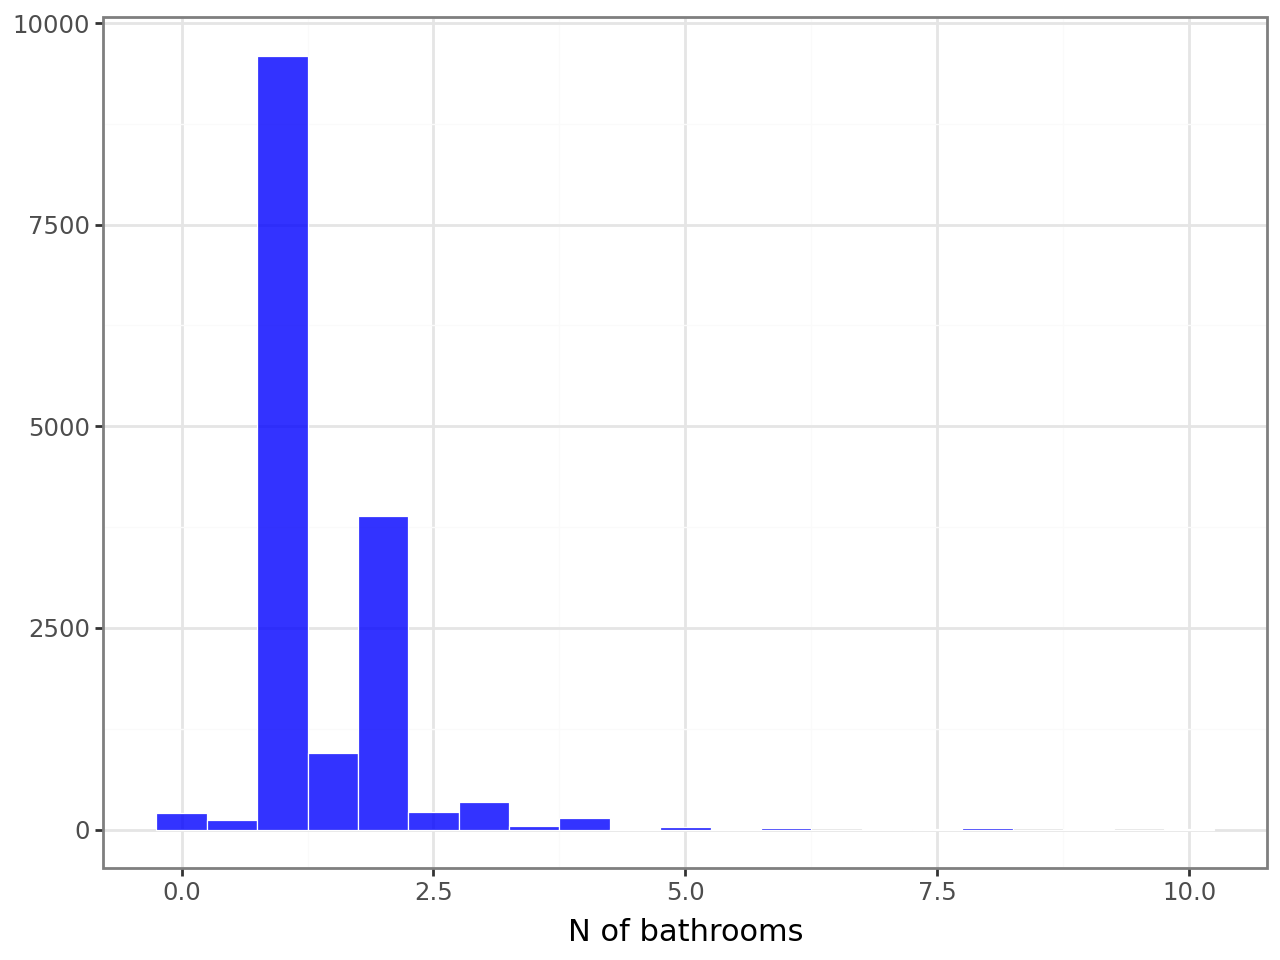

In [53]:
## bathrooms
(
    ggplot(data, aes("n_bathrooms"))
    + geom_histogram(
        binwidth=0.5, closed="left", fill='blue', color="white", alpha=0.8, size=0.25
    )
    + ylab("")
    + xlab("N of bathrooms")
    + theme_bw()
)


In [54]:
bins = [0, 1, 2, 10]
labels = [0, 1, 2]

data['f_bathroom'] = pd.cut(data['n_bathrooms'], bins=bins, labels=labels, right=False)

In [55]:
data["n_bathrooms"].dtype

dtype('float64')

In [56]:
data.groupby("f_bathroom").agg(mean_price=("price", np.mean), n=("price", "size"))

,mean_price,n
f_bathroom,,
0,92.641337,329
1,92.423992,10545
2,150.961360,4736


In [57]:
## Number of reviews
nreview_plot = data.loc[data.n_number_of_reviews < 100]


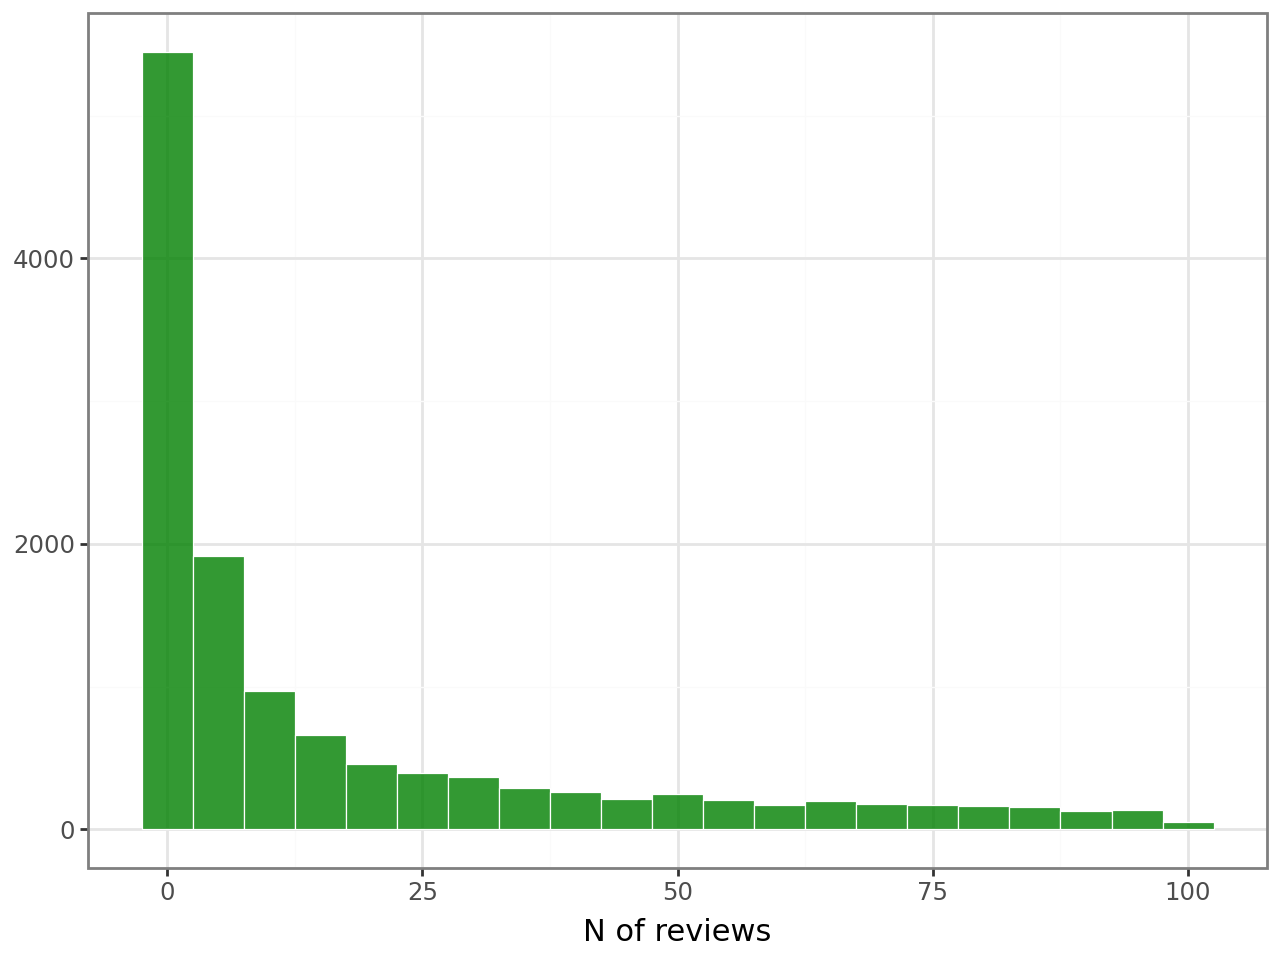

In [58]:
(
    ggplot(nreview_plot, aes("n_number_of_reviews"))
    + geom_histogram(binwidth=5, fill='green', color="white", alpha=0.8, size=0.25)
    + ylab("")
    + xlab("N of reviews")
    + theme_bw()
)


In [59]:
# number of reviews: use logs as well
data["ln_number_of_reviews"] = np.log(data["n_number_of_reviews"] + 1)


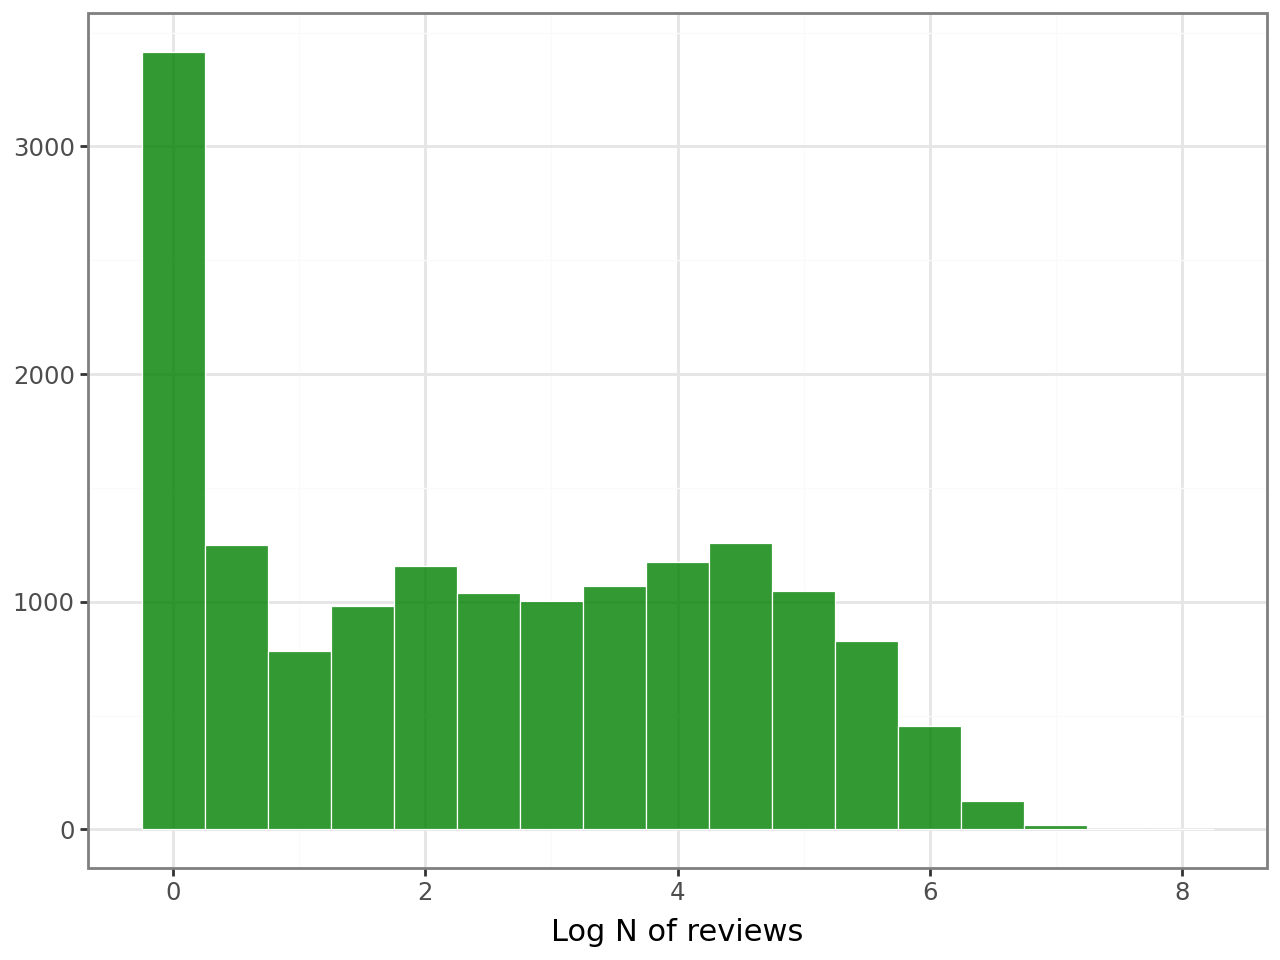

In [60]:
(
    ggplot(data, aes("ln_number_of_reviews"))
    + geom_histogram(binwidth=0.5, fill='green', color="white", alpha=0.8, size=0.25)
    + ylab("")
    + xlab("Log N of reviews")
    + theme_bw()
)


In [61]:
bins = [0,1,51,max(data.n_number_of_reviews)]
labels = [0,1,2]
data["f_number_of_reviews"] = pd.cut(data["n_number_of_reviews"],bins = bins, labels = labels, right = False)

In [62]:
data.groupby("f_number_of_reviews").agg(
    median_price=("price", np.median),
    mean_price=("price", np.mean),
    n=("price", "size"),
)


,median_price,mean_price,n
f_number_of_reviews,,,
0,80.0,111.709895,3416
1,80.0,100.964239,7718
2,106.0,125.359169,4477


In [63]:
# Regression 1: log-price and number of reviews
smf.ols(formula="ln_price ~ f_number_of_reviews", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     294.4
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          3.18e-126
Time:                        22:39:22   Log-Likelihood:                -16516.
No. Observations:               15611   AIC:                         3.304e+04
Df Residuals:                   15608   BIC:                         3.306e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.3328      0.012    363.279      0.000       4.309       4.356
f_number_of_reviews[T.1]     0.0240      0.014      1.678      0.093      -0.004       0.052
f_number_of_reviews[T.2]     0.3153      0.016     19.908      0.000       0.284       0.346
==============================================================================
Omnibus:                      350.074   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.259
Skew:                           0.267   Prob(JB):                    1.90e-105
Kurtosis:                       3.676   Cond. No.                         4.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Regression 2: log-price and log number of reviews
smf.ols(formula="ln_price ~ ln_number_of_reviews", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     519.5
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          3.80e-113
Time:                        22:39:22   Log-Likelihood:                -16553.
No. Observations:               15612   AIC:                         3.311e+04
Df Residuals:                   15610   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2730      0.009    472.585      0.000       4.255       4.291
ln_number_of_reviews     0.0655      0.003     22.792      0.000       0.060       0.071
==============================================================================
Omnibus:                      394.184   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.632
Skew:                           0.291   Prob(JB):                    8.95e-119
Kurtosis:                       3.705   Cond. No.                         5.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
## Time since
# Create variables, measuring the time since: squared, cubic, logs
for var in [
    "ln_days_since",
    "ln_days_since2",
    "ln_days_since3",
    "n_days_since2",
    "n_days_since3",
]:
    if var[:2] == "ln":
        try:
            data[var] = np.log(data["n_days_since"]) ** int(var[-1])
        except ValueError:
            data[var] = np.log(data["n_days_since"])
    else:
        data[var] = (data["n_days_since"]) ** int(var[-1])


In [66]:
# Check the effect
lndays_plot = data.loc[(data.price <= 800) & (data.ln_days_since > 2)]


In [67]:
data.n_number_of_reviews.describe()


count    15612.000000
mean        57.154817
std        111.479788
min          0.000000
25%          1.000000
50%         10.000000
75%         65.000000
max       2896.000000
Name: n_number_of_reviews, dtype: float64

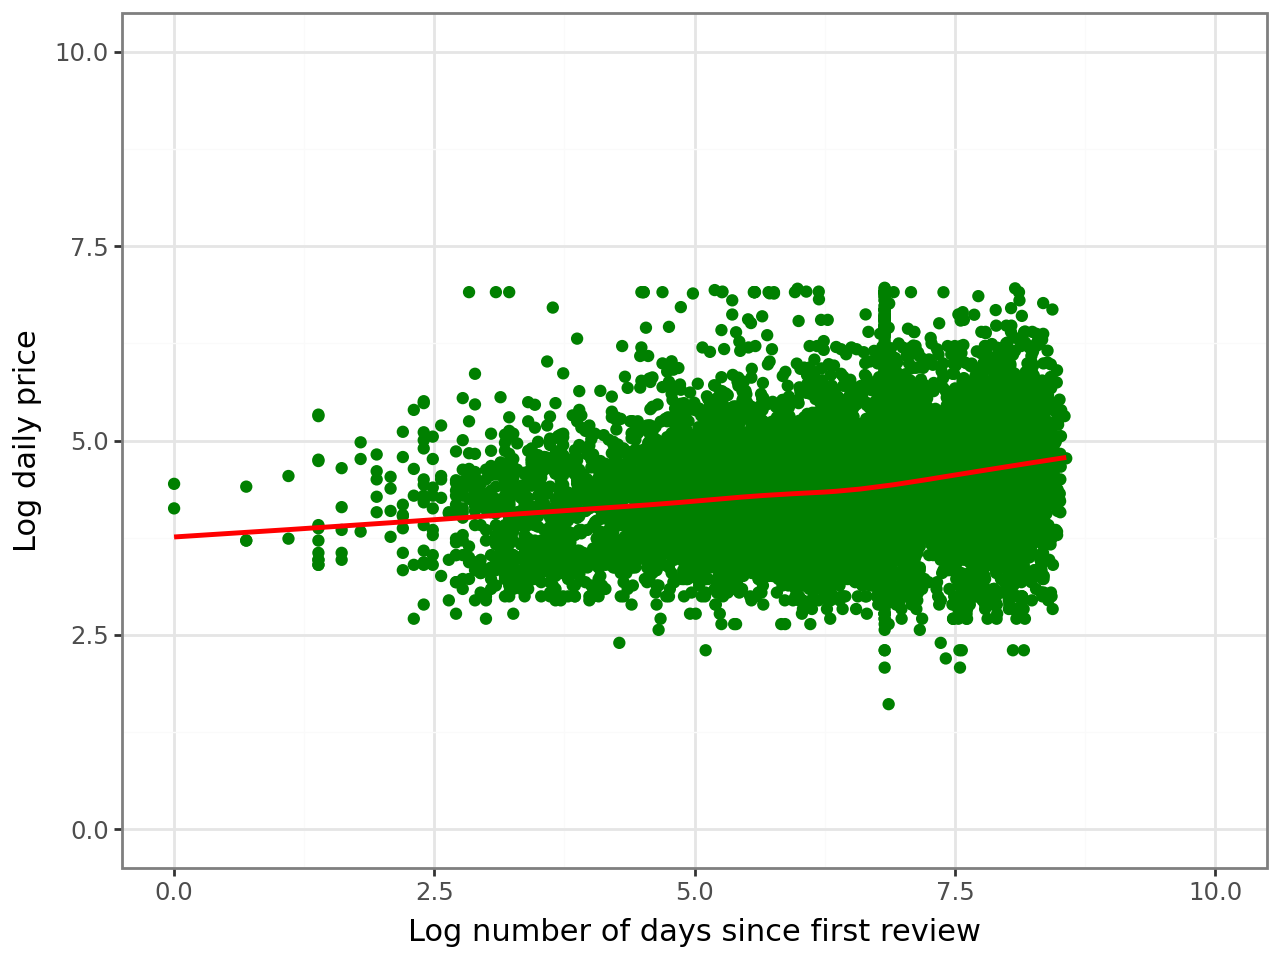

In [68]:
(
    ggplot(data, aes(x="ln_days_since", y="ln_price"))
    + geom_point(size=1.5, colour='green')
    + ylim(0, 10)
    + xlim(0, 10)
    + geom_smooth(method="lowess", colour='red', se=False)
    + labs(x="Log number of days since first review", y="Log daily price")
    + theme_bw()
)


In [69]:
data.n_review_scores_rating.describe()

count    15612.000000
mean         4.618156
std          0.443689
min          1.000000
25%          4.540000
50%          4.710000
75%          4.840000
max          5.000000
Name: n_review_scores_rating, dtype: float64

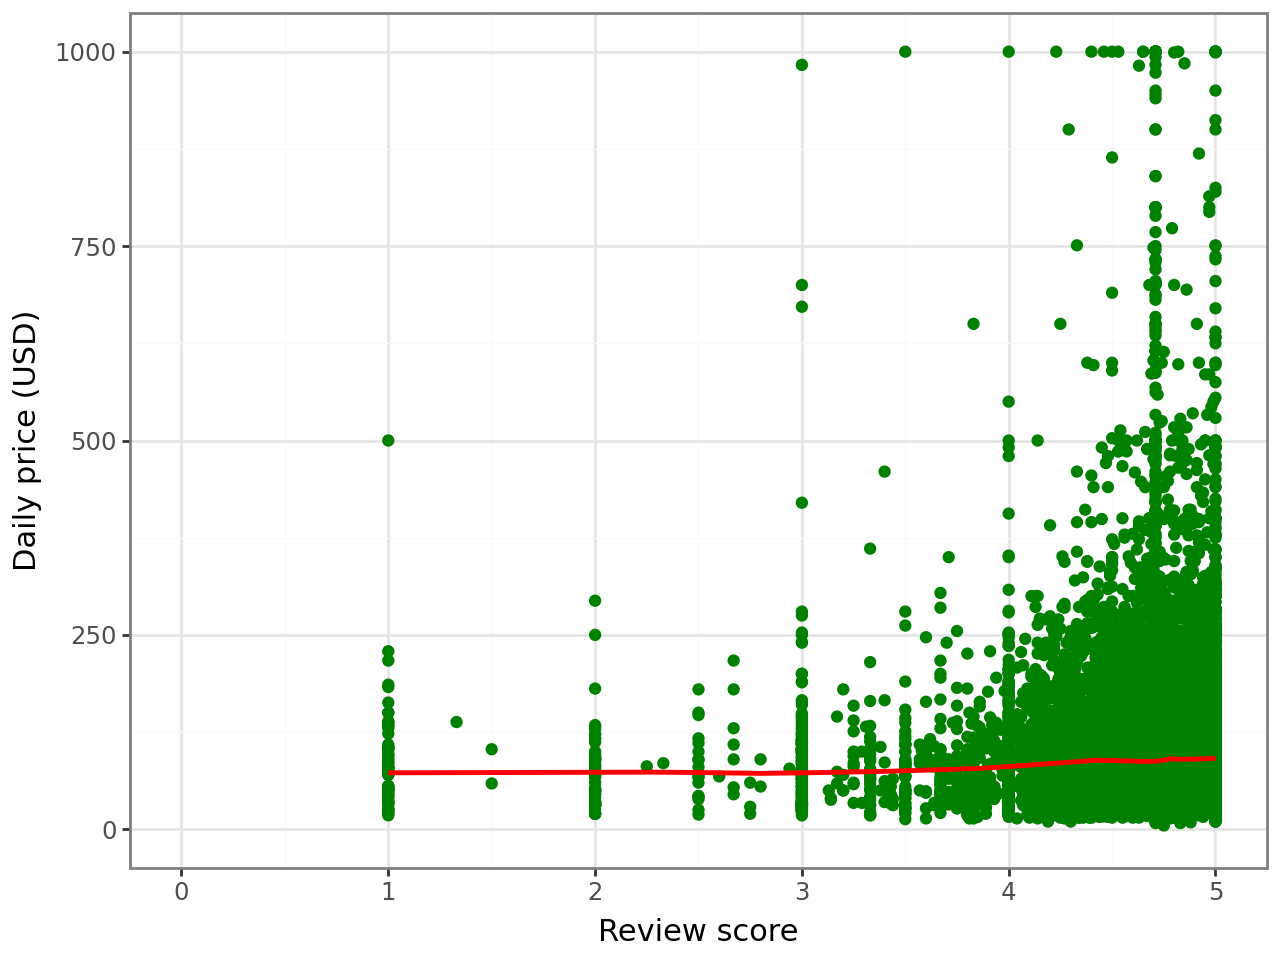

In [70]:
## review score effect
(
    ggplot(data, aes(x="n_review_scores_rating", y="price"))
    + geom_point(size=1.5, colour='green')
    + ylim(0, 1000)
    + xlim(0, 5)
    + geom_smooth(method="lowess", colour='red', se=False)
    + labs(x="Review score", y="Daily price (USD)")
    + theme_bw()
)


In [71]:
data["ln_review_scores_rating"] = np.log(data["n_review_scores_rating"])


In [72]:
# Regression 1) ln price - num of review scores
smf.ols(formula="ln_price ~ n_review_scores_rating", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     74.18
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           7.81e-18
Time:                        22:39:32   Log-Likelihood:                -16771.
No. Observations:               15612   AIC:                         3.355e+04
Df Residuals:                   15610   BIC:                         3.356e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.9266      0.059     66.223      0.000       3.810       4.043
n_review_scores_rating     0.1101      0.013      8.613      0.000       0.085       0.135
==============================================================================
Omnibus:                      143.631   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.335
Skew:                           0.166   Prob(JB):                     1.39e-38
Kurtosis:                       3.397   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Regression 2) ln price - log num of review scores

smf.ols(formula="ln_price ~ ln_review_scores_rating", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     53.80
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           2.32e-13
Time:                        22:39:32   Log-Likelihood:                -16782.
No. Observations:               15612   AIC:                         3.357e+04
Df Residuals:                   15610   BIC:                         3.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.9747      0.063     63.089      0.000       3.851       4.098
ln_review_scores_rating     0.3022      0.041      7.335      0.000       0.221       0.383
==============================================================================
Omnibus:                      146.325   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.414
Skew:                           0.169   Prob(JB):                     2.99e-39
Kurtosis:                       3.398   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
## minimum nights
smf.ols(formula="ln_price ~ n_minimum_nights", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     917.3
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          7.58e-196
Time:                        22:39:32   Log-Likelihood:                -16363.
No. Observations:               15612   AIC:                         3.273e+04
Df Residuals:                   15610   BIC:                         3.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5570      0.007    666.545      0.000       4.544       4.570
n_minimum_nights    -0.0083      0.000    -30.287      0.000      -0.009      -0.008
==============================================================================
Omnibus:                      544.527   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.369
Skew:                           0.276   Prob(JB):                    2.42e-220
Kurtosis:                       4.118   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
bins = [1,2,3,max(data.n_minimum_nights)]
labels = [1,2,3]
data["f_minimum_nights"] = pd.cut(data["n_minimum_nights"], bins = bins, labels = labels, right = False)

In [76]:
## minimum nights
smf.ols(formula="ln_price ~ f_minimum_nights", data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     282.1
Date:                Sun, 02 Mar 2025   Prob (F-statistic):          4.59e-121
Time:                        22:39:32   Log-Likelihood:                -16530.
No. Observations:               15611   AIC:                         3.307e+04
Df Residuals:                   15608   BIC:                         3.309e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6083      0.010    462.292      0.000       4.589       4.628
f_minimum_nights[T.2]    -0.0817      0.020     -4.184      0.000      -0.120      -0.043
f_minimum_nights[T.3]    -0.2854      0.012    -23.035      0.000      -0.310      -0.261
==============================================================================
Omnibus:                      117.088   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.967
Skew:                           0.148   Prob(JB):                     4.04e-31
Kurtosis:                       3.358   Cond. No.                         4.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
data.groupby("room_type").agg(mean_price=("price", np.mean), n=("price", "size"))


,mean_price,n
room_type,,
Entire home/apt,133.353709,10568
Hotel room,133.394737,76
Private room,60.790837,4824
Shared room,65.402778,144


In [78]:
inf = data.isin([np.inf, -np.inf]).sum()
inf[inf > 0]


ln_beds    311
dtype: int64

In [79]:
data = data.replace([np.inf, -np.inf], np.nan)


In [80]:
data.isnull().sum().loc[lambda x: x > 0]

ln_beds                311
f_bathroom               2
f_number_of_reviews      1
f_minimum_nights         1
dtype: int64

In [81]:
data.to_csv("cleaned_data_barca2.csv", index=False)
